# Lab 9 Report: 
## Final Project Codebase

## Project Title: Unraveling Gravitational Ripples: Neural Network Classification

### Group Members: Daniel Fredin & Cole Welch

--------------------

In [1]:
# %matplotlib inline

import numpy as np
import h5py 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField

from scipy import signal
from scipy.fft import fftshift

# Initializes numpy and pytorch random seeds for reproducibility 
seed = 55
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

## Prepare Data

#### Retreive Dataset

### Old Data

In [2]:
# ### -------------Load dataset------------- ###

# # Define the file name
# filename = 'GW3_Transformer.h5'

# # Open the file
# with h5py.File(filename, 'r') as file:
#     # Load the datasets
#     bkg_train = np.array(file['bkg_train'])
#     bkg_test = np.array(file['bkg_test'])
#     signal_train = np.array(file['signal_train'])
#     signal_test = np.array(file['signal_test'])

In [3]:
# ### -------------Label our data as background or signal------------- ###

# # Allows us to easily apply labels to our data to denote it as signal or background for classification.
# anomaly_class = {
#     'Background': 0,
#     'Signal': 1
# }

# # ID our data as background or signal.
# bkg_train_ids = np.full(bkg_train.shape[0], anomaly_class['Background'], dtype=int)
# bkg_test_ids = np.full(bkg_test.shape[0], anomaly_class['Background'], dtype=int)

# signal_train_ids = np.full(signal_train.shape[0], anomaly_class['Signal'], dtype=int)
# signal_test_ids = np.full(signal_test.shape[0], anomaly_class['Signal'], dtype=int)

In [4]:
# ### -------------Merge dataset------------- ###

# # Stick our background and signal data together for training and testing.
# x_train = np.concatenate((bkg_train, signal_train), axis=0).transpose((0,2,1))
# y_train = np.concatenate((bkg_train_ids, signal_train_ids), axis=0)

# x_test_data = np.concatenate((bkg_test, signal_test), axis=0).transpose((0,2,1))
# y_test = np.concatenate((bkg_test_ids, signal_test_ids), axis=0)

### New Data

In [5]:
### -------------Load dataset------------- ###

# Define the file name
filename = 'classify_data.h5'

# Open the file
with h5py.File(filename, 'r') as file:
    # Load the datasets
    bbh_train = np.array(file['Training']['bbh'])
    bbh_val = np.array(file['Validation']['bbh'])
    glitch_train = np.array(file['Training']['glitch'])
    glitch_val = np.array(file['Validation']['glitch'])

In [6]:
### -------------Label our data as background or signal------------- ###

# Allows us to easily apply labels to our data to denote it as signal or background for classification.
anomaly_class = {
    'Glitch': 0,
    'Signal': 1
}

# ID our data as background or signal.
glitch_train_ids = np.full(glitch_train.shape[0], anomaly_class['Glitch'], dtype=int)
glitch_val_ids = np.full(glitch_val.shape[0], anomaly_class['Glitch'], dtype=int)

bbh_train_ids = np.full(bbh_train.shape[0], anomaly_class['Signal'], dtype=int)
bbh_val_ids = np.full(bbh_val.shape[0], anomaly_class['Signal'], dtype=int)

In [7]:
### -------------Merge dataset------------- ###

# Stick our background and signal data together for training and testing.
x_train = np.concatenate((glitch_train, bbh_train), axis=0).transpose((0,2,1))
y_train = np.concatenate((glitch_train_ids, bbh_train_ids), axis=0)

x_test_data = np.concatenate((glitch_val, bbh_val), axis=0).transpose((0,2,1))
y_test = np.concatenate((glitch_val_ids, bbh_val_ids), axis=0)

In [8]:
### -------------Shuffle dataset------------- ###

# Shuffle the training data using a randomly chosen permutation. This ensures we don't encounter artifacts from background 
# and signal data being clumped together.
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

#### Convert Data to Images

In [9]:
### -------------Split detector dataset------------- ###

# Each 2D dataset of gravitational wave data comes from one of two detectors: 0 (located in Hanford, WA) and 1 
# (located in Livingston, LA). Split the data from these two detectors since we can only pass 2D images into our CNN to train.
x_train_dec1 = x_train[:,:,0]
x_train_dec2 = x_train[:,:,1]

x_test_dec1 = x_test_data[:,:,0]
x_test_dec2 = x_test_data[:,:,1]

In [10]:
### -------------Convert dataset to GASF------------- ###

# Utilize Gramian Angular Fields to transform our image from time series to images so that we can apply a CNN to classify
# them (see https://medium.com/analytics-vidhya/encoding-time-series-as-images-b043becbdbf3 for an explanation of how this works).




# # Scale data with MinMax scaler for input into GASF
# scaler = MinMaxScaler()
# x_train_dec1 = scaler.fit_transform(x_train_dec1)
# x_train_dec2 = scaler.fit_transform(x_train_dec2)

# x_test_dec1 = scaler.fit_transform(x_test_dec1)
# x_test_dec2 = scaler.fit_transform(x_test_dec2)



# gasf = GramianAngularField(image_size=28, method="summation")
# # Convert training data to image format
# img_x_train_dec1 = gasf.fit_transform(x_train_dec1)
# img_x_train_dec2 = gasf.fit_transform(x_train_dec2)

# # Convert testing data to image format
# img_x_test_dec1 = gasf.transform(x_test_dec1)
# img_x_test_dec2 = gasf.transform(x_test_dec2)


# Utilize FFT Spectrograms







# Utilize MarkovTransitionField, which is an alternative to Gramian Angular Fields. We use this to compare with our GASF results. 
# It turns out that this method performs worse (~95% accuracy instead of ~97% with GASF).

# mtf = MarkovTransitionField(image_size=28)
# # Convert training data to image
# img_x_train_dec1 = mtf.fit_transform(x_train_dec1)
# img_x_train_dec2 = mtf.fit_transform(x_train_dec2)

# # Convert testing data to image
# img_x_test_dec1 = mtf.transform(x_test_dec1)
# img_x_test_dec2 = mtf.transform(x_test_dec2)

In [11]:
# import numpy as np
# from scipy import signal
# from scipy.fft import fftshift
# import matplotlib.pyplot as plt
# rng = np.random.default_rng()

# fs = 10e3
# N = 1e4
# amp = 2 * np.sqrt(2)
# noise_power = 0.01 * fs / 2
# time = np.arange(N) / float(fs)
# mod = 500*np.cos(2*np.pi*0.25*time)
# carrier = amp * np.sin(2*np.pi*3e3*time + mod)
# noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
# noise *= np.exp(-time/5)
# x = carrier + noise
# plt.plot(time, x)
# plt.show()

# f, t, Sxx = signal.spectrogram(x, fs)
# plt.pcolormesh(t, f, Sxx, shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

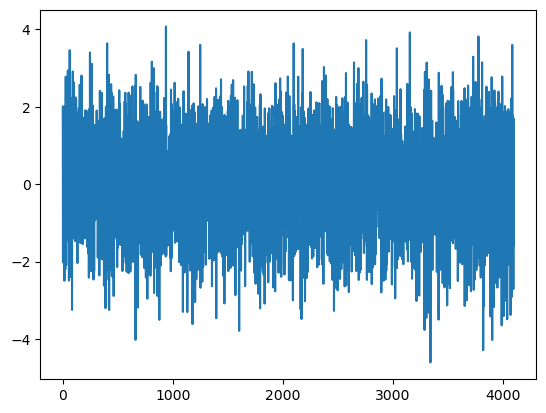

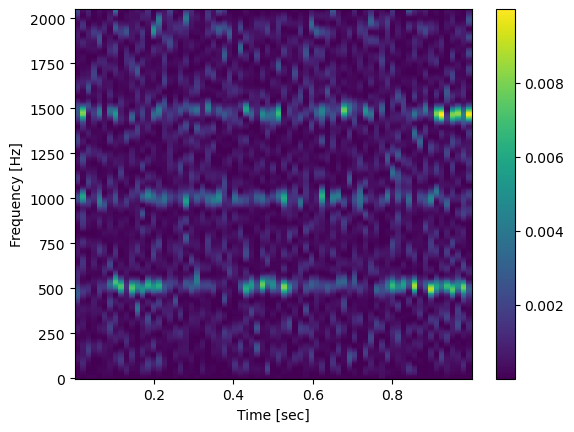

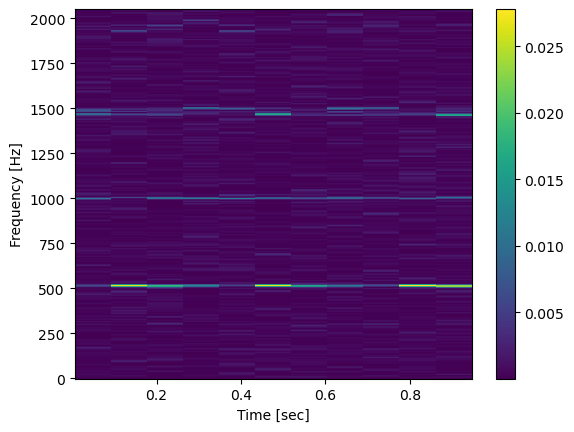

In [12]:
plt.plot(x_train_dec1[14000,:])
plt.show()

fs = 4096
NFFT=900

f, t, Sxx = signal.spectrogram(x_train_dec1[14000,:], fs=fs,nperseg=64,scaling='density',mode='psd',nfft=NFFT)
plt.pcolormesh(t, f, Sxx, shading='auto', vmin=Sxx.min(), vmax=Sxx.max())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()	
plt.show()

# Pxx, freqs, bins, im = plt.specgram(x_train_dec1[0,:], NFFT=NFFT, Fs=fs, noverlap=8)
# plt.axis((None, None, 0, 0.5))
# plt.show()

f, t, Sxx = signal.spectrogram(x_train_dec1[14000,:], fs=fs, nfft=NFFT, nperseg=400)
plt.pcolormesh(t, f, Sxx, shading='auto', vmin=Sxx.min(), vmax=Sxx.max())
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()	
plt.show()

# plt.imshow(Sxx, aspect='auto', cmap='hot_r', origin='lower')

## GWpy testing

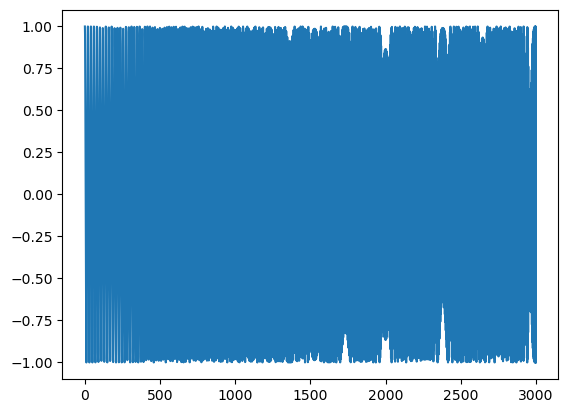

In [13]:
import numpy as np

# Generate np.array chirp signal
dt = 0.001
t = np.arange(0,3,dt)
f0 = 50
f1 = 250
t1 = 2
x = np.cos(2*np.pi*t*(f0 + (f1 - f0)*np.power(t, 2)/(3*t1**2)))
fs = 1/dt

plt.plot(x)				# plot the chirp signal
plt.show()				# display

In [14]:
from gwpy.timeseries import TimeSeries
series = TimeSeries(x, dt = 0.001, unit='s', name='test', t0=0)     #np.array --> constantQ.timeseries    
 

hdata = series
sq = hdata.q_transform()				# q transform
print(len(sq[0]))       # freq array length
print(len(sq))          # time array length

plt.imshow(sq.T, origin='lower')				# plot the spectrogram
plt.colorbar()									# colorbar
plt.show()										# display

# from scipy import signal as scisignal

# freq, ts, Sxx = scisignal.spectrogram(x)		# scipy spectrogram

# plt.pcolor(ts, freq, Sxx, shading='auto')		# plot the spectrogram
# plt.colorbar()									# colorbar
# plt.show()										# display	

391
1000


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp_qwi6_ry 7047aaa5111e4d8dda9c547b5b45d07c.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (MiKTeX 23.5) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(7047aaa5111e4d8dda9c547b5b45d07c.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-05-11>
(C:\Users\danfr\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(C:\Users\danfr\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))

! LaTeX Error: File `helvet.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1cm}^^M
No pages of output.
Transcript written on C:\Users\danfr\.matplotlib\tex.cache\70\47\tmp_qwi6_ry\70
47aaa5111e4d8dda9c547b5b45d07c.log.




<Figure size 640x480 with 2 Axes>

In [15]:
series.nbytes

24000

## experimenting with our data

In [16]:
len(x_train_dec1[0,:])


4096

1
1000


ValueError: Cannot determine x-axis stride (dx)from a single data point

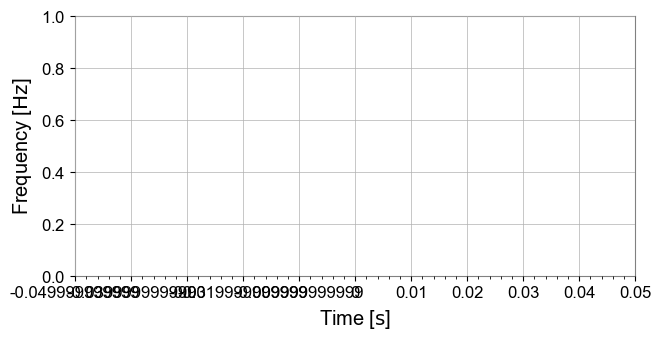

In [17]:
from gwpy.timeseries import TimeSeries
data = x_train_dec1[19000,:]
series = TimeSeries(data, name='test', t0=0)     #np.array --> constantQ.timeseries    

hdata = series
sq = hdata.q_transform()				# q transform
print(len(sq[0]))       # freq array length
print(len(sq))          # time array length


plot = sq.plot(figsize=[8,4])
plot.show()

# plt.imshow(sq.T, origin='lower')				# plot the spectrogram
# plt.colorbar()									# colorbar
# plt.show()										# display


# from scipy import signal as scisignal

# freq, ts, Sxx = scisignal.spectrogram(data)		# scipy spectrogram

# plt.pcolor(ts, freq, Sxx, shading='auto')		# plot the spectrogram
# plt.colorbar()									# colorbar
# plt.show()		

ValueError: Cannot determine x-axis stride (dx)from a single data point

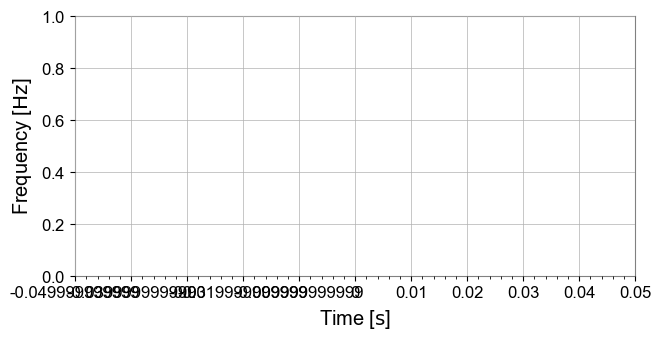

In [18]:
plot = sq.plot(figsize=[8, 4])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(20, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy')
plot.show()


In [19]:
from gwpy.timeseries import TimeSeries


data = x_train_dec1[8000,:]
series = TimeSeries(data, sample_rate = 4096, unit='s', name='test', t0=0)     #np.array --> constantQ.timeseries   
series1 = series.highpass(frequency=1)

# from numpy import random
# series = TimeSeries(random.random(100), sample_rate=4096, unit='m')




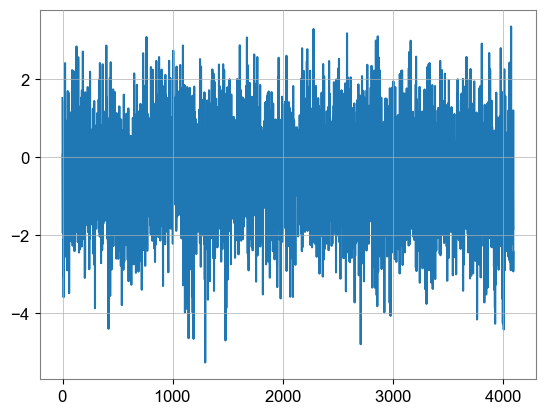

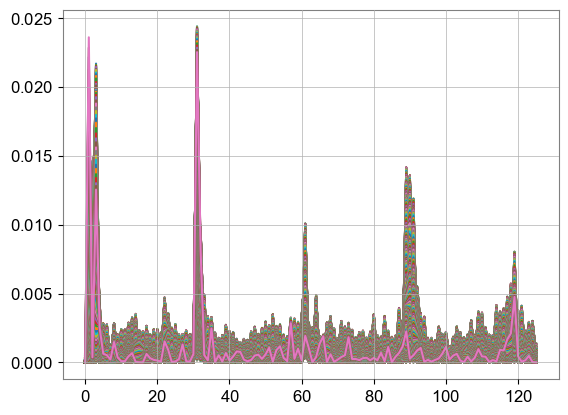

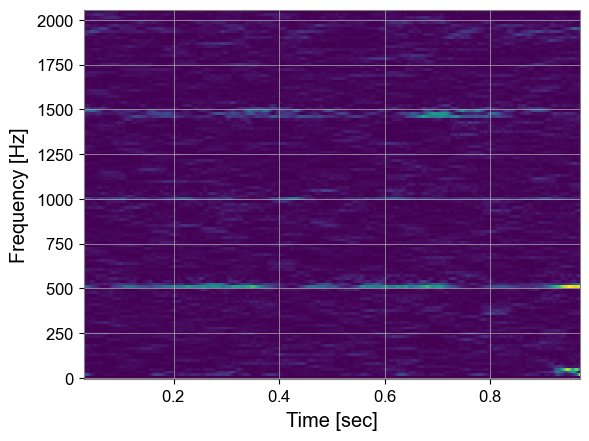

In [20]:
f, t, Sxx = signal.spectrogram(series1, fs = 4096, nperseg=250, noverlap = 249, return_onesided = True) 
plt.plot(data)
plt.show()
plt.plot(Sxx)
plt.show()

plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()



c:\Users\danfr\anaconda3\envs\newenv\lib\site-packages\gwpy\plot\plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


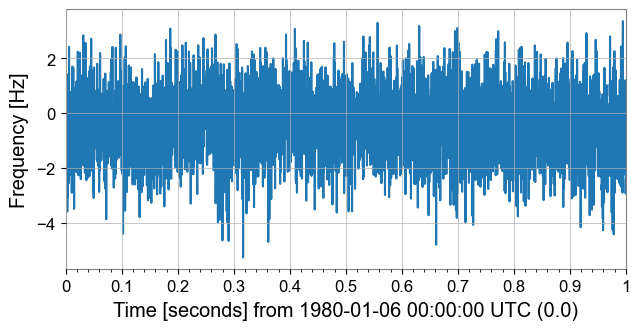

In [21]:
# plt.plot(series)
# series.plot()
plot = series.plot(figsize=[8, 4])
ax = plot.gca()
ax.set_xscale('seconds')
# ax.set_yscale('log')
ax.set_xlim(0, 1)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
# ax.colorbar(cmap='viridis', label='Normalized energy')
plot.show()

In [22]:
gwdata = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)
print(data)
data.shape

[ 1.5246763  -0.25812653 -0.8622691  ...  1.205782   -2.9296079
 -2.4383276 ]


(4096,)

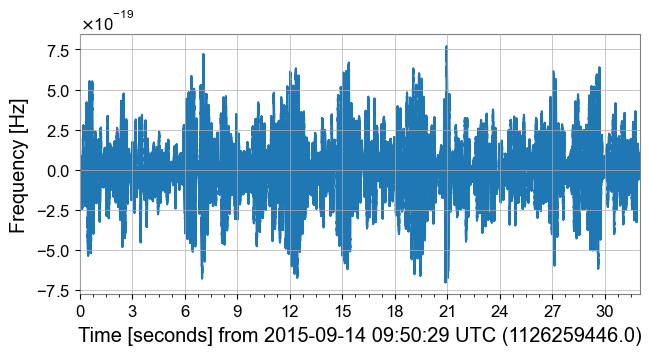

In [23]:

# plt.plot(series)
# series.plot()
plot = gwdata.plot(figsize=[8, 4])
ax = plot.gca()
ax.set_xscale('seconds')
# ax.set_yscale('log')
# ax.set_xlim(0, 1)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
# ax.colorbar(cmap='viridis', label='Normalized energy')
plot.show()

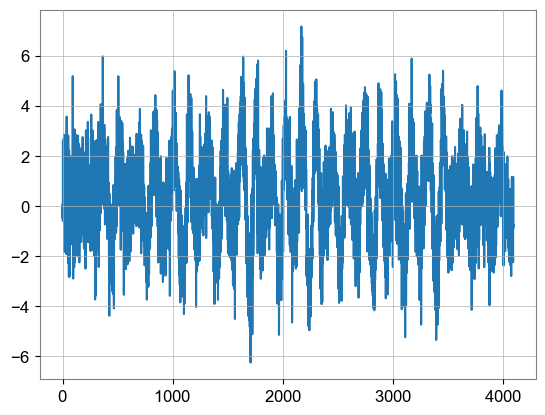

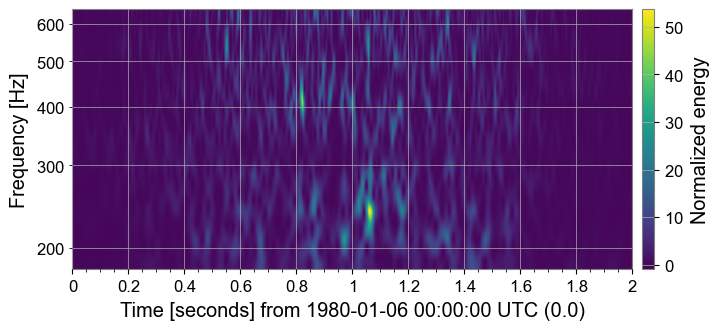

In [52]:
from gwpy.timeseries import TimeSeries
data = x_train_dec1[16000,:]
series = TimeSeries(data, sample_rate = 2048, unit='s', name='test', t0=0)     #np.array --> constantQ.timeseries  

plt.plot(data)
plt.show()


qspecgram = series.q_transform()				# q transform

plot = qspecgram.plot(figsize=[8, 4])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
# ax.set_ylim(20, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy')
plot.show()

## Real gw data

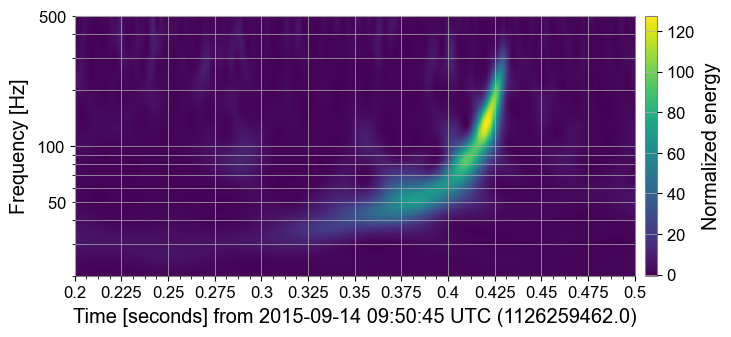

In [25]:
from gwpy.timeseries import TimeSeries

data = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)

qspecgram = data.q_transform(outseg=(1126259462.2, 1126259462.5))

plot = qspecgram.plot(figsize=[8, 4])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(20, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy')
plot.show()


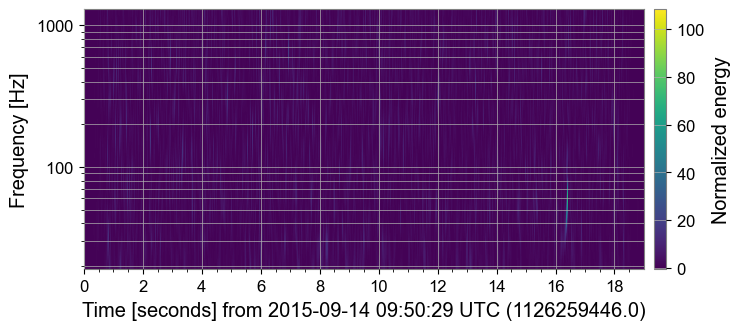

In [38]:
from gwpy.timeseries import TimeSeries

data = TimeSeries.fetch_open_data('H1', 1126259446, 1126259465)

qspecgram = data.q_transform()

plot = qspecgram.plot(figsize=[8, 4])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
# ax.set_ylim(20, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy')
plot.show()

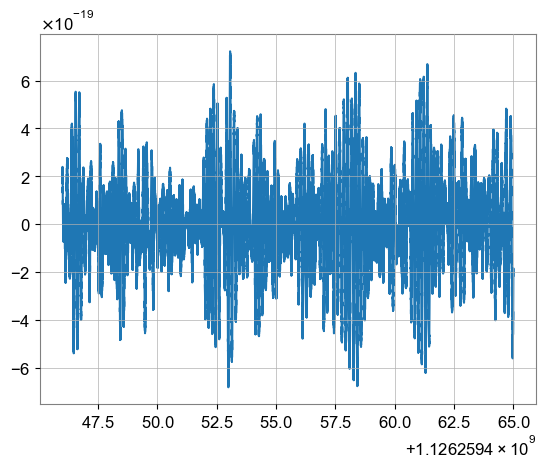

In [34]:
plt.plot(data)

## Testing

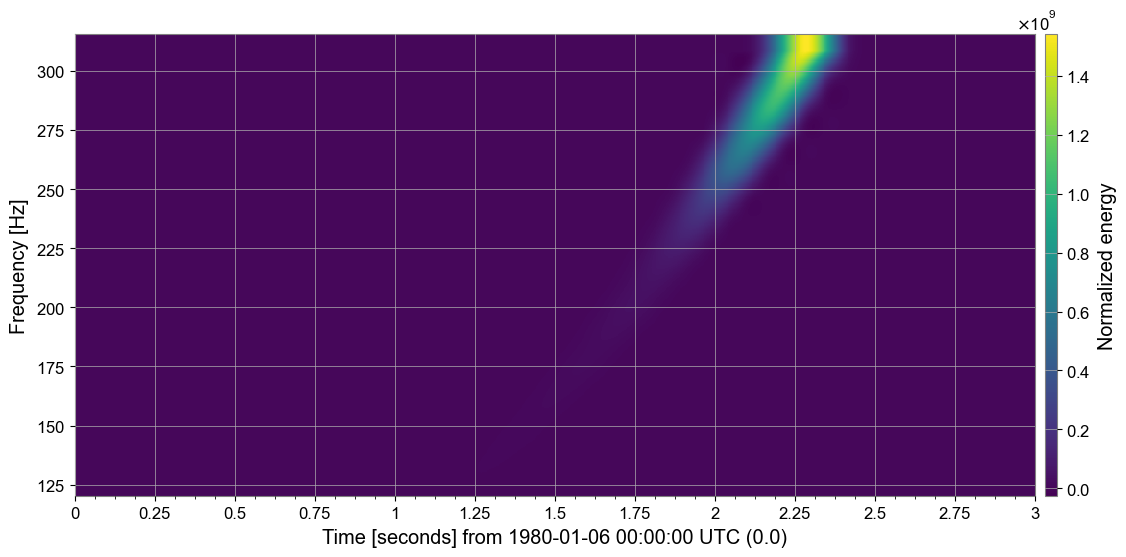

In [27]:
from gwpy.timeseries import TimeSeries



series = TimeSeries(x, dt = 0.001, unit='m', name='test', t0=0)     #np.array --> constantQ.timeseries   



q = series.q_transform()
plot = q.plot()
ax = plot.gca()
ax.set_xscale('seconds')

ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy')
plot.show()

<StemContainer object of 3 artists>

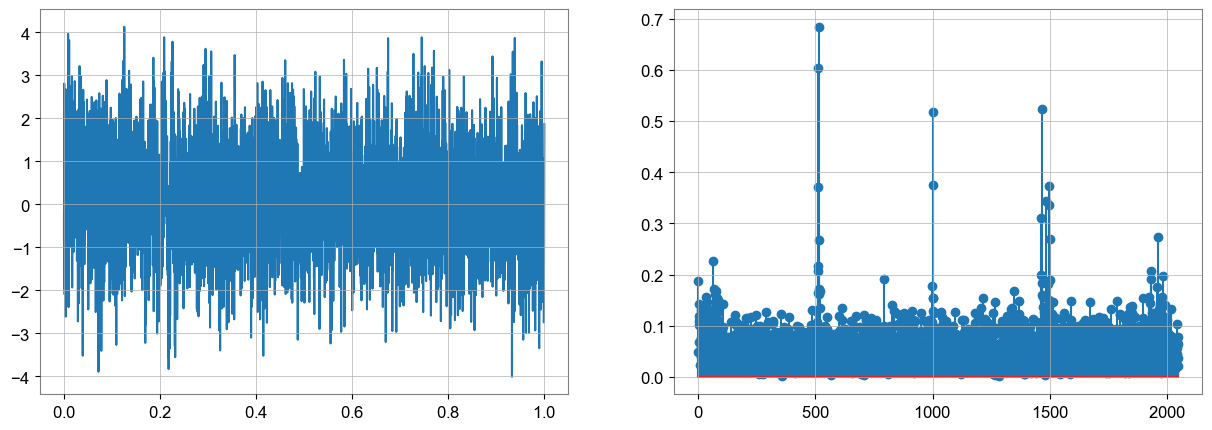

In [28]:
# Frequency and sampling rate
f = 10 # frequency
Fs = 4096 # sampling rate
t = np.arange(0,1,1/Fs)
# Sine function
# y = np.sin(2 * np.pi * f * t)
y = x_train_dec1[1,:]
# Perform Fourier transform using scipy
from scipy import fftpack
y_fft = fftpack.fft(y)
# Plot data
n = int(np.size(t)/2)
fr = Fs/2 * np.linspace(0,1,n)
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(t, y)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain

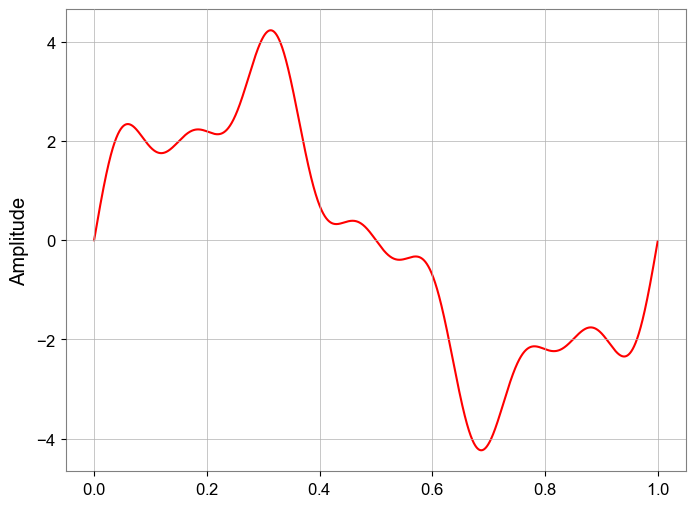

In [29]:
# sampling rate
sr = 4096
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

c:\Users\danfr\anaconda3\envs\newenv\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


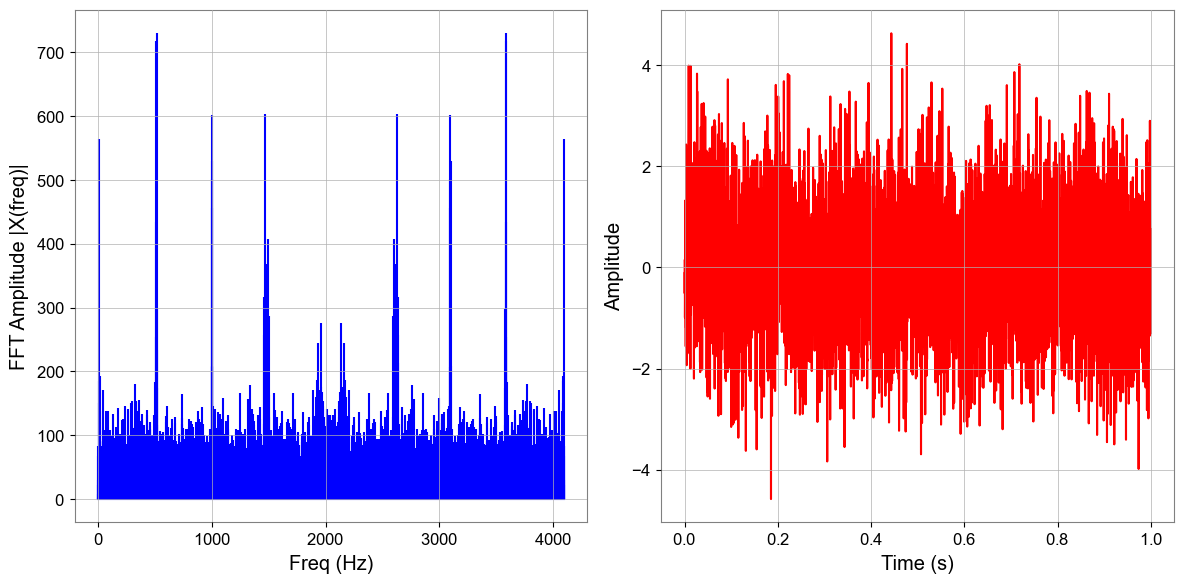

In [30]:
from numpy.fft import fft, ifft
sr=4096
x = x_train_dec1[17958,:]
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

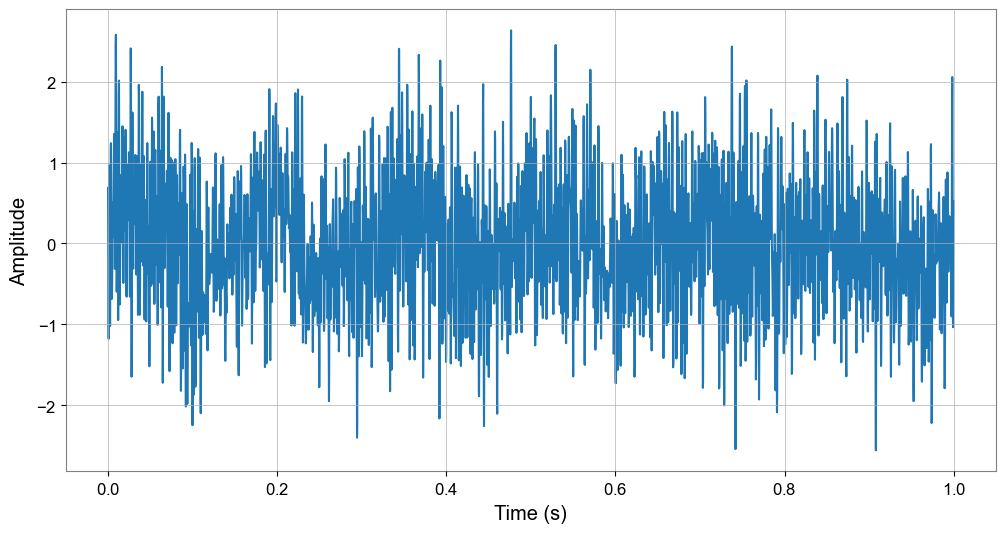

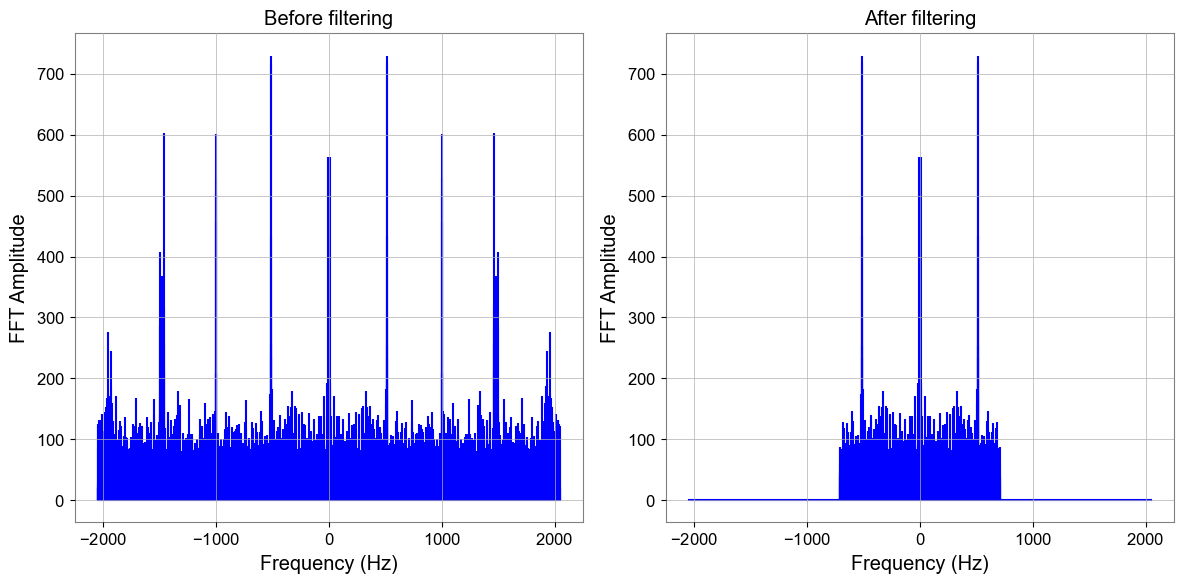

In [31]:
from scipy.fftpack import fftfreq

# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./4096)

# define the cut-off frequency
cut_off = 711

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[(np.abs(freq) > cut_off-1)] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
# plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
# plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()